In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
file_path = "intp2002.data"  # Adjust path if needed

df = pd.read_csv(
    file_path,
    skiprows=1,
    sep=r"\s+",
    names=["t_start", "t_end", "E_nue", "E_nueb", "E_nux", "N_nue", "N_nueb", "N_nux"]
)


In [11]:
ERG_TO_JOULE = 1e-7
DISTANCE_MPC_BETELGEUSE = 0.0002
DISTANCE_M_BETELGEUSE = DISTANCE_MPC_BETELGEUSE * 3.086e22

df["dt"] = df["t_end"] - df["t_start"]
df["E_total_erg"] = df["E_nue"] + df["E_nueb"] + df["E_nux"]
df["E_total_J"] = df["E_total_erg"] * ERG_TO_JOULE
df["Cumulative_Energy_J"] = df["E_total_J"].cumsum()
df["Fluence_J_per_m2"] = df["Cumulative_Energy_J"] / (4 * np.pi * DISTANCE_M_BETELGEUSE**2)


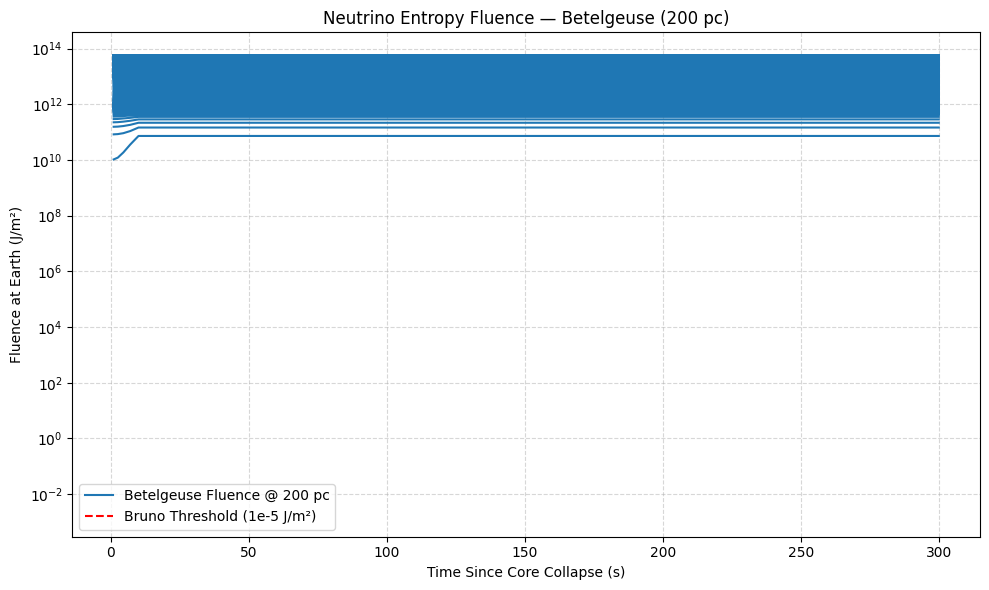

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df["t_end"], df["Fluence_J_per_m2"], label="Betelgeuse Fluence @ 200 pc")
plt.axhline(1e-5, color="red", linestyle="--", label="Bruno Threshold (1e-5 J/m²)")
plt.xlabel("Time Since Core Collapse (s)")
plt.ylabel("Fluence at Earth (J/m²)")
plt.yscale("log")
plt.title("Neutrino Entropy Fluence — Betelgeuse (200 pc)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
threshold = 1e-5  # J/m²
cross_index = np.where(df["Fluence_J_per_m2"] >= threshold)[0]
bruno_trigger_time = df["t_end"].iloc[cross_index[0]] if len(cross_index) > 0 else None

print("🛎️ Bruno triggers at:", bruno_trigger_time, "seconds after collapse")


🛎️ Bruno triggers at: 1.0 seconds after collapse


In [16]:
df[["t_start", "t_end", "dt", "E_total_J", "Cumulative_Energy_J", "Fluence_J_per_m2"]].head(10)


,t_start,t_end,dt,E_total_J,Cumulative_Energy_J,Fluence_J_per_m2
0,0.0,1.0,1.0,5.018403e+48,5.018403e+48,1.048344e+10
1,1.0,2.5,1.5,8.068333e+47,5.825236e+48,1.216891e+10
2,2.5,4.5,2.0,3.103090e+48,8.928326e+48,1.865127e+10
3,4.5,7.0,2.5,8.279340e+48,1.720767e+49,3.594680e+10
4,7.0,10.0,3.0,1.776522e+49,3.497289e+49,7.305833e+10
5,10.0,14.0,4.0,1.181141e+43,3.497290e+49,7.305836e+10
6,14.0,19.0,5.0,6.588680e+40,3.497290e+49,7.305836e+10
7,19.0,25.0,6.0,1.700602e+38,3.497290e+49,7.305836e+10
8,25.0,32.0,7.0,1.134016e+35,3.497290e+49,7.305836e+10
9,32.0,40.0,8.0,2.145529e+31,3.497290e+49,7.305836e+10


In [17]:
from pathlib import Path
import nbformat

# Load the notebook to inspect its cells and structure
notebook_path = Path("Bruno_Betelgeuse_Fluence.ipynb")
with notebook_path.open() as f:
    notebook = nbformat.read(f, as_version=4)

# Extract code cells
code_cells = [cell['source'] for cell in notebook.cells if cell.cell_type == 'code']
code_cells[-3:]  # Show the last few cells to see where it crashed or ended


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 58590: character maps to <undefined>